In [1]:
import pandas as pd

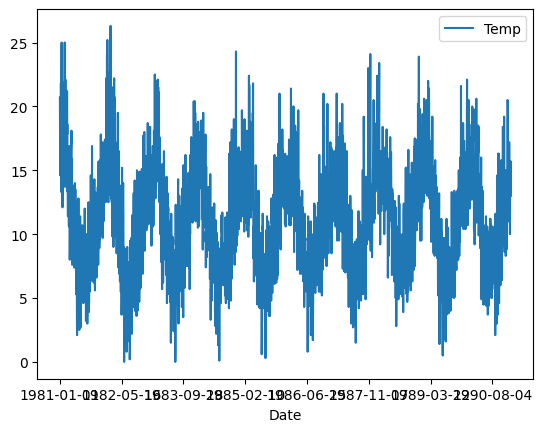

3650


In [2]:
from matplotlib import pyplot
series = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0)
series.plot()
pyplot.show()
print(series.size)

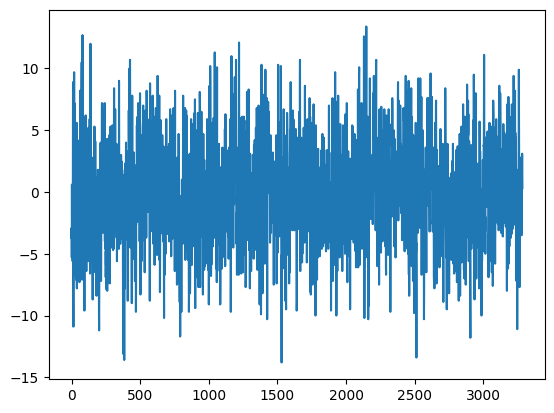

3285


In [5]:
from matplotlib import pyplot
series = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0)
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    value = X[i] - X[i - days_in_year]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()
print(len(diff))

In [6]:
from matplotlib import pyplot
series = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0)
series.index

Index(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04', '1981-01-05',
       '1981-01-06', '1981-01-07', '1981-01-08', '1981-01-09', '1981-01-10',
       ...
       '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25', '1990-12-26',
       '1990-12-27', '1990-12-28', '1990-12-29', '1990-12-30', '1990-12-31'],
      dtype='object', name='Date', length=3650)

In [7]:
#Es importante tener los índices del tiempo datetime
series.index = pd.to_datetime(series.index)

                 Temp
Date                 
1981-01-31  17.712903
1981-02-28  17.678571
1981-03-31  13.500000
1981-04-30  12.356667
1981-05-31   9.490323
1981-06-30   7.306667
1981-07-31   7.577419
1981-08-31   7.238710
1981-09-30  10.143333
1981-10-31  10.087097
1981-11-30  11.890000
1981-12-31  13.680645
1982-01-31  16.567742


C:\Users\lcres\AppData\Local\Temp\ipykernel_16988\3937201440.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resample = series.resample('M')


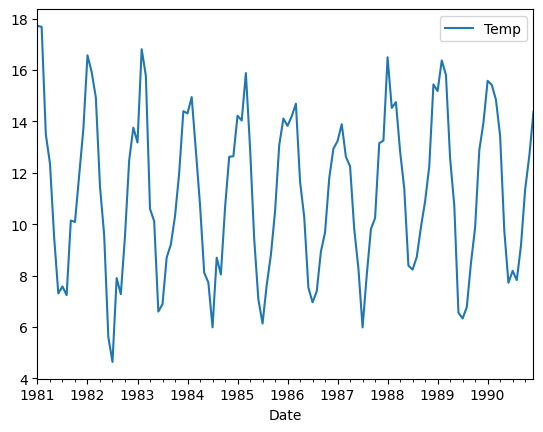

In [8]:
resample = series.resample('M')
monthly_mean = resample.mean()
print(monthly_mean.head(13))
monthly_mean.plot()
pyplot.show()

In [12]:
#¿Qué error produce este código?
resample = series.resample('M')
#El error es .....

C:\Users\lcres\AppData\Local\Temp\ipykernel_16988\3659467566.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resample = series.resample('M')


In [14]:
from matplotlib import pyplot
series = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0)
series.index = pd.to_datetime(series.index)
resample = series.resample('ME')
monthly_mean = resample.mean()
diff = list()
months_in_year = 12

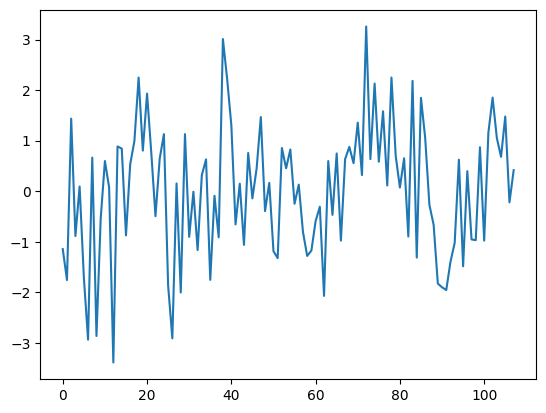

In [15]:
for i in range(months_in_year, len(monthly_mean)):
    value = monthly_mean.iloc[i,0] - monthly_mean.iloc[i - months_in_year,0]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

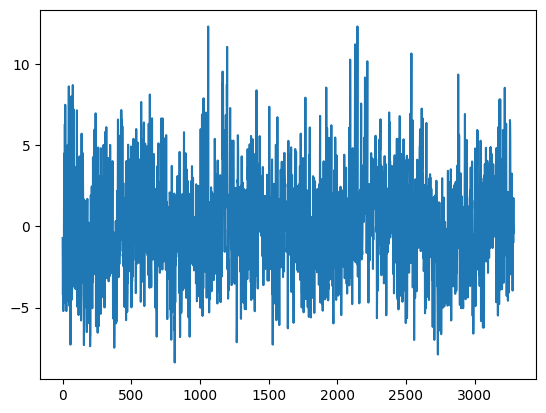

In [16]:
from matplotlib import pyplot
series = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0)
series.index = pd.to_datetime(series.index)
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    month_str = str(series.index[i].year-1)+'-'+str(series.index[i].month)
    month_mean_last_year = series.loc[month_str].mean()
    value = X[i] - month_mean_last_year
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

Coefficients: [[-1.17308000e-08]
 [ 9.30253946e-06]
 [-2.15977594e-03]
 [ 1.19147966e-01]
 [ 1.38980178e+01]]
Coeficiente más bajo: [13.89801778]


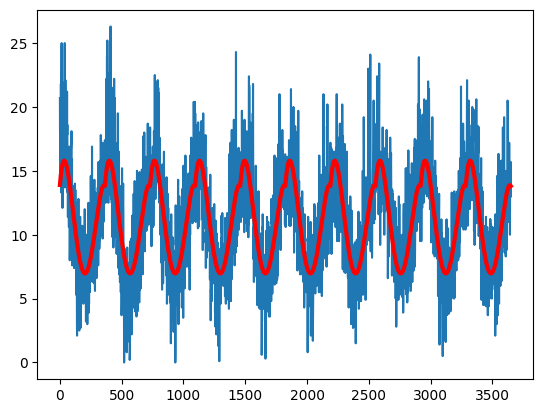

In [17]:
from matplotlib import pyplot
from numpy import polyfit

series = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0)
# fit polynomial: x^2*b1 + x*b2 + ... + bn
#y = x^4*b1 + x^3*b2 + x^2*b3 + x^1*b4 + b5
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)
# create curve
curve = list()
print('Coeficiente más bajo: %s' % coef[-1])
for i in range(len(X)):
    #value = coef[-1] #-1 nos devuelve siempre el último coeficiente, en este caso debido a la función polyfit es 
                        # el coeficiente de menor potencia
    value = 13.89
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
# plot curve over original data
pyplot.plot(series.values)
pyplot.plot(curve, color='red', linewidth=3)
pyplot.show()

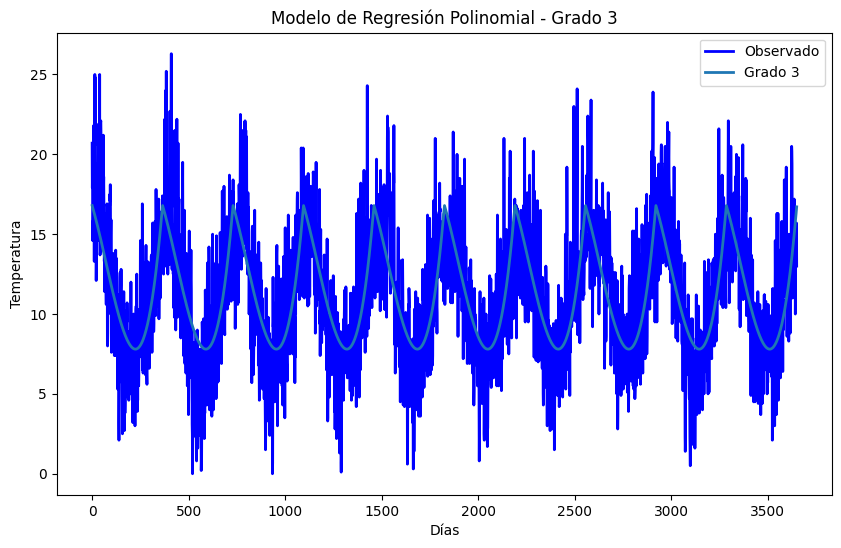

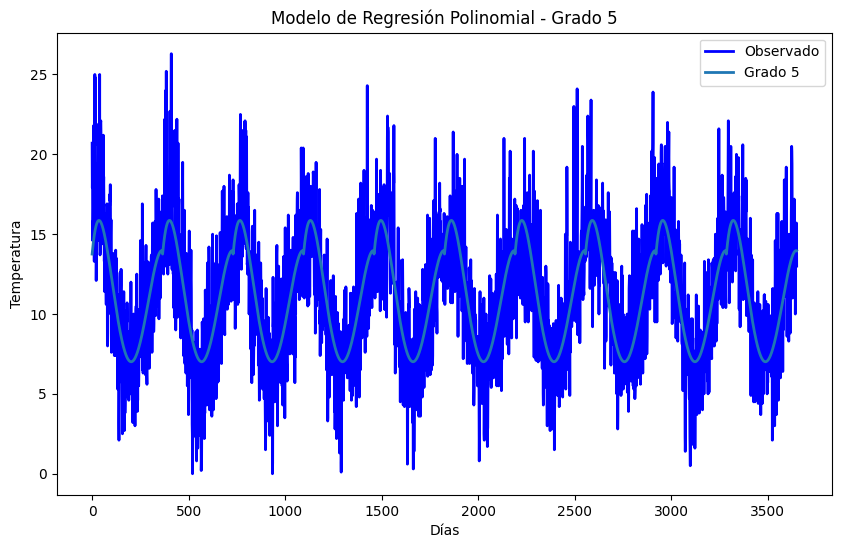

In [20]:
import pandas as pd
from matplotlib import pyplot
from numpy import polyfit

# Cargar el dataset
series = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0)

# Preparar datos para el ajuste polinomial
X = [i % 365 for i in range(0, len(series))]
y = series.values

# Grados de los polinomios a probar
degrees = [3,  5]

# Ajustar y plotear cada modelo polinomial en gráficas separadas
for degree in degrees:
    coef = polyfit(X, y, degree)
    curve = [sum(coef[d] * x**(degree-d) for d in range(degree+1)) for x in X]
    
    pyplot.figure(figsize=(10, 6))
    pyplot.plot(series.values, label='Observado', color='blue', linewidth=2)
    pyplot.plot(curve, label=f'Grado {degree}', linewidth=2)
    pyplot.legend()
    pyplot.title(f'Modelo de Regresión Polinomial - Grado {degree}')
    pyplot.xlabel('Días')
    pyplot.ylabel('Temperatura')
    pyplot.show()
